In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
import plotly.express as px
from collections import defaultdict
from typing import Union

%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.family"] = "Times New Roman"

In [2]:
datasets = [
    "breast_cancer",
    "glass",
    "iris",
    "letter",
    "mnist",
    "motion_sense",
    "satimage",
    "segment",
    "vehicle",
    "wine"
]

datasets_sizes = {
    "breast_cancer": 144,
    "glass": 24,
    "iris": 12,
    "letter": 2664,
    "mnist": 53672,
    "motion_sense": 12512,
    "satimage": 1864,
    "segment": 368,
    "vehicle": 132,
    "wine": 24
}

dataset_classes = {
    "breast_cancer": 2,
    "glass": 6,
    "iris": 3,
    "letter": 26,
    "mnist": 10,
    "motion_sense": 6,
    "satimage": 6,
    "segment": 7,
    "vehicle": 3,
    "wine": 3
}

dataset_train_samples = {
    "breast_cancer": 398,
    "glass": 149,
    "iris": 105,
    "letter": 1400,
    "mnist": 60000,
    "motion_sense": 3414,
    "satimage": 4501,
    "segment": 1617,
    "vehicle": 676,
    "wine": 124 
}

dataset_test_samples = {
    "breast_cancer": 171,
    "glass": 65,
    "iris": 45,
    "letter": 6000,
    "mnist": 10000,
    "motion_sense": 1020,
    "satimage": 1929,
    "segment": 693,
    "vehicle": 170,
    "wine": 54 
}

dataset_balanced = {
    "breast_cancer": "no",
    "glass": "no",
    "iris": "yes",
    "letter": "yes",
    "mnist": "yes",
    "motion_sense": "yes",
    "satimage": "no",
    "segment": "yes",
    "vehicle": "yes",
    "wine": "no"   
}

metrics_to_use = {
    "breast_cancer": "f1 weighted",
    "glass": "f1 weighted",
    "iris": "accuracy",
    "letter": "accuracy",
    "mnist": "accuracy",
    "motion_sense": "accuracy",
    "satimage": "f1 weighted",
    "segment": "accuracy",
    "vehicle": "accuracy",
    "wine": "f1 weighted"
}


dfs = [
    pd.read_csv(exp)
    for dset in datasets
    for exp in Path(f"{dset} experiment").glob("*.csv")
]

df = pd.concat(dfs)
df.replace({"mnist-dist-16": "mnist"}, inplace=True)
df
# d = json.loads(df.iloc[0]["encoder kwargs"])

,bleach,accuracy,f1 weighted,f1 macro,f1 micro,ties,run,train time,predict time,ram name,...,encoder kwargs,experiment name,model size,train samples,test samples,classes,rams per discriminator,discriminators,seed,indices
0,2,0.918129,0.918781,0.914107,0.918129,18,1,1.812207,0.481705,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9624,398,171,2,30,2,1670370805,480
1,5,0.929825,0.929825,0.925088,0.929825,7,1,1.812207,0.338999,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9624,398,171,2,30,2,1670370805,480
2,10,0.947368,0.947101,0.943263,0.947368,3,1,1.812207,0.338749,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9624,398,171,2,30,2,1670370805,480
3,2,0.929825,0.930384,0.926378,0.929825,26,2,0.497607,0.338319,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9720,398,171,2,30,2,1670370808,480
4,5,0.941520,0.941694,0.937954,0.941520,13,2,0.497607,0.339714,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9720,398,171,2,30,2,1670370808,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,5,0.870370,0.869781,0.873519,0.870370,3,3,0.071017,0.087331,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208
432,8,0.888889,0.888060,0.892690,0.888889,6,3,0.071017,0.086613,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208
433,10,0.814815,0.812150,0.816460,0.814815,5,3,0.071017,0.081598,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208
434,15,0.814815,0.798173,0.808999,0.814815,4,3,0.071017,0.081574,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208


In [3]:
meta = defaultdict(dict)
for dset in datasets:
    meta[dset]["size (KB)"] = datasets_sizes[dset]
    meta[dset]["classes"] = dataset_classes[dset]
    meta[dset]["train samples"] = dataset_train_samples[dset]
    meta[dset]["test samples"] = dataset_test_samples[dset]
    meta[dset]["balanced"] = dataset_balanced[dset]

meta_df = pd.DataFrame(meta).T
meta_df

,size (KB),classes,train samples,test samples,balanced
breast_cancer,144,2,398,171,no
glass,24,6,149,65,no
iris,12,3,105,45,yes
letter,2664,26,1400,6000,yes
mnist,53672,10,60000,10000,yes
motion_sense,12512,6,3414,1020,yes
satimage,1864,6,4501,1929,no
segment,368,7,1617,693,yes
vehicle,132,3,676,170,yes
wine,24,3,124,54,no


In [4]:
latex_tables_path = Path("tables")
figures_path = Path("figures")

def write_figure(filename: str, fig: go.Figure, path: Union[Path, str] = figures_path):
    """Write a Figure to a file.

    Parameters
    ----------
    filename : str
        The name of the file to write to.
    fig : go.Figure
        The plotly figure object.
    path : Union[Path, str], optional
        The path where the file will be stored, by default figures_path
    """
    path = Path(path)
    path.mkdir(exist_ok=True, parents=True)
    fname = path/filename
    fig.write_image(fname)
    print(f"Figure written to: {fname}")
    print(f"Filename   :", filename)
    print(f"Latex label:", filename.replace(".pdf",""))
    
def write_latex_table(filename: str, table: str, path: Union[Path, str] = latex_tables_path):
    """Write a latex table to a file.

    Parameters
    ----------
    filename : str
        The name of the file to write to.
    table : str
        The table, as a string.
    path : Union[Path, str], optional
        The path where the file will be stored, by default latex_tables_path
    """
    path = Path(path)
    path.mkdir(exist_ok=True, parents=True)
    fname = path/filename
    with fname.open("w") as f:
        f.write("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n")
        f.write("%% WARNING: DO NOT CHANGE THIS FILE. IT IS GENERATED AUTOMATICALLY %\n")
        f.write("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n")
        f.write(table)
    print(f"Table written to: {fname}")



In [5]:
df = df[df["dataset name"] != "segment"]
df = df[df["ram kwargs"] != '{"est_elements": 1000, "false_positive_rate": 0.05}']
df = df[df["ram kwargs"] != '{"width": 1000, "depth": 5}']
df = df[df["ram kwargs"] != '{"width": 1000, "depth": 3}']
df


,bleach,accuracy,f1 weighted,f1 macro,f1 micro,ties,run,train time,predict time,ram name,...,encoder kwargs,experiment name,model size,train samples,test samples,classes,rams per discriminator,discriminators,seed,indices
0,2,0.918129,0.918781,0.914107,0.918129,18,1,1.812207,0.481705,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9624,398,171,2,30,2,1670370805,480
1,5,0.929825,0.929825,0.925088,0.929825,7,1,1.812207,0.338999,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9624,398,171,2,30,2,1670370805,480
2,10,0.947368,0.947101,0.943263,0.947368,3,1,1.812207,0.338749,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9624,398,171,2,30,2,1670370805,480
3,2,0.929825,0.930384,0.926378,0.929825,26,2,0.497607,0.338319,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9720,398,171,2,30,2,1670370808,480
4,5,0.941520,0.941694,0.937954,0.941520,13,2,0.497607,0.339714,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,9720,398,171,2,30,2,1670370808,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,5,0.870370,0.869781,0.873519,0.870370,3,3,0.071017,0.087331,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208
432,8,0.888889,0.888060,0.892690,0.888889,6,3,0.071017,0.086613,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208
433,10,0.814815,0.812150,0.816460,0.814815,5,3,0.071017,0.081598,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208
434,15,0.814815,0.798173,0.808999,0.814815,4,3,0.071017,0.081574,stream-threshold,...,"{""resolution"": 16}",wine experiment,117624,124,54,3,13,3,1670371352,208


In [46]:
rename_elements = {
    'DictRam {}': "Dict-WiSARD",
    'count-bloom {"est_elements": 100, "false_positive_rate": 0.02}': 'CB FPR=0.02',
    'count-bloom {"est_elements": 100, "false_positive_rate": 0.05}': 'CB FPR=0.05',
    'count-bloom {"est_elements": 100, "false_positive_rate": 0.08}': 'CB FPR=0.08',
    'count-min-sketch {"width": 20, "depth": 2}': 'CMS W=20 D=2',
    'count-min-sketch {"width": 20, "depth": 3}': 'CMS W=20 D=3',
    'count-min-sketch {"width": 50, "depth": 2}': 'CMS W=50 D=2',
    'count-min-sketch {"width": 50, "depth": 3}': 'CMS W=50 D=3',
    'count-min-sketch {"width": 100, "depth": 3}': 'CMS W=100 D=3',
    'count-min-sketch {"width": 100, "depth": 5}': 'CMS W=100 D=5',
    #'count-min-sketch {"width": 500, "depth": 3}': 'CMS W=500 D=3',
    # 'count-min-sketch {"width": 500, "depth": 5}': 'CMS W=500 D=5',
    # 'count-min-sketch {"width": 1000, "depth": 3}': 'CMS W=1000 D=3',
    # 'count-min-sketch {"width": 1000, "depth": 5}': 'CMS W=1000 D=5',
}

element_order = [
    "Dict-WiSARD",
    'CB FPR=0.02',
    'CB FPR=0.05',
    'CB FPR=0.08',
    'CMS W=20 D=2',
    'CMS W=20 D=3',
    'CMS W=50 D=2',
    'CMS W=50 D=3',
    'CMS W=100 D=3',
    'CMS W=100 D=5',
    #'CMS W=500 D=3',
    # 'CMS W=500 D=5',
    # 'CMS W=1000 D=3',
    # 'CMS W=1000 D=5'
]

datasets_order = [
    "iris",
    "glass",
    "wine",
    "vehicle",
    "breast_cancer",
    # "segment (368)",
    "satimage",
    'letter',
    'motion_sense',
    'mnist'
]

In [47]:
def get_best(df: pd.DataFrame, metric: str = None, improvement_col: str = "DictRam {}"):
    configs = list(k for k, _ in df[df["ram name"].isin(["DictRam", "count-min-sketch", "count-bloom"])].groupby(["ram name", "ram kwargs"]))
    datasets = list(df["dataset name"].unique())

    d = defaultdict(dict)
    for c in configs:
        c_str = f"{c[0]} {c[1]}"
        for dset in datasets:
            metric_to_use = metrics_to_use[dset]
            x = df.loc[(df["ram name"] == c[0]) & (df["ram kwargs"] == c[1]) & (df["dataset name"] == dset)]
            best = x.sort_values(by=metric_to_use, ascending=False).iloc[0]
            if metric is None:
                metric = metric_to_use
            d[c_str][dset] = best[metric]
            
    d = pd.DataFrame(d)
    if improvement_col is not None:
        r = d[improvement_col]
        for c in d.columns:
            d[c] = d[c] / r
                
    return pd.DataFrame(d)

def do_rename_and_reorder(d, remove_dict: bool = False):
    d = d.rename(columns=rename_elements)
    if remove_dict:
        d = d[element_order[1:]]
    else:
        d = d[element_order]
    d = d.T
    # d = d.rename(columns=datasets_rename)
    d = d[datasets_order]
    return d


Figure written to: figures/size_improvement.pdf
Filename   : size_improvement.pdf
Latex label: size_improvement


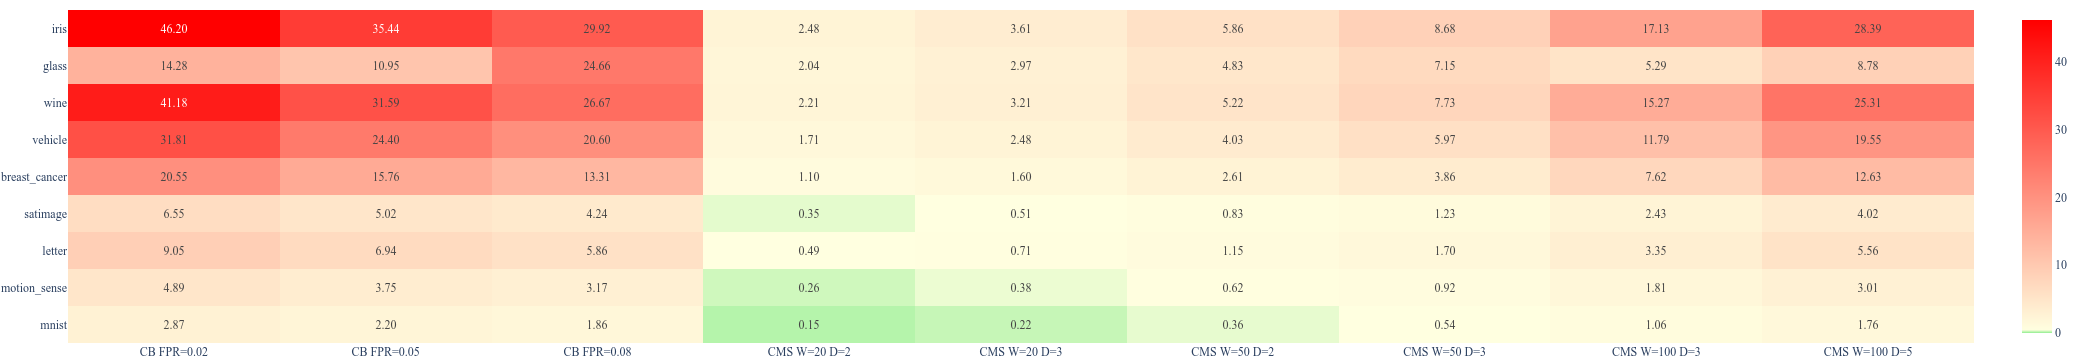

In [57]:
d = get_best(df, metric="model size")
d = do_rename_and_reorder(d, remove_dict=True)
# d["max"] = d.max(axis=1)
# d["average"] = d.mean(axis=1)
# d["min"] = d.min(axis=1)

d = d.T

fig = px.imshow(
    d,
    text_auto=".2f",
    aspect="auto",
    # color_continuous_scale='RdBu_r',
    color_continuous_scale=[(0.0, "lightgreen"), (0.01, "lightyellow"), (1.0, "red")],
    color_continuous_midpoint=1.0,
    # zmax=2,
    zmin=0,
)

# fig.update_xaxes(side="top")
fig.update_layout(
    # xaxis_title="Filter",
    # yaxis_title="Dataset",
    width=1000,
    height=200,
    font_family="Times New Roman", 
    font_size=12, 
    margin=dict(l=0, r=0, t=10, b=0),
    xaxis=dict(tickangle=0, tickfont = dict(size=12)),
    yaxis=dict(tickangle=0, tickfont = dict(size=12))
)

write_figure("size_improvement.pdf", fig)

fig.show()

Figure written to: figures/accuracy_improvement.pdf
Filename   : accuracy_improvement.pdf
Latex label: accuracy_improvement


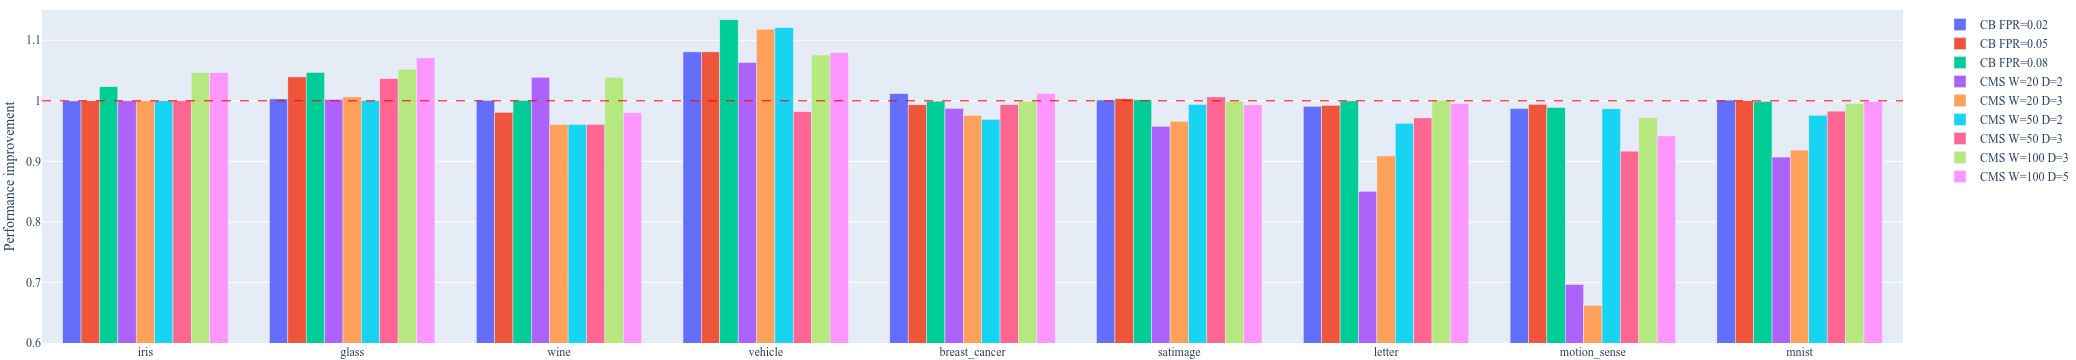

In [59]:
d = get_best(df, metric=None)
d = do_rename_and_reorder(d, remove_dict=True)
d = d.T
d

dsets = list(d.index)
fig = go.Figure()
for i, c in enumerate(d.columns):
    x = dsets
    y = d[c]
    name = c
    fig.add_trace(
        go.Bar(
            x=x,
            y=y,
            # text="pop",
            # textfont="Times New Roman",
            # textposition="auto",
            name=name,
            marker_color=px.colors.qualitative.Plotly[i]
        )
    )
    
fig.add_hline(y=1, line_width=1, line_dash="dash", line_color="red")

fig.update_yaxes(range=[0.60, 1.15]) 

fig.update_layout(
    yaxis_title="Performance improvement",
    # xaxis_title="Dataset",
    width=800,
    height=200,
    font_family="Times New Roman", 
    font_size=12,
    margin=dict(l=0, r=0, t=10, b=0),
    xaxis=dict(tickfont = dict(size=12))
    # legend_title_text="Filter"
)

write_figure("accuracy_improvement.pdf", fig)
    
fig.show()

In [ ]:
d = get_best(df, metric=None, improvement_col=None)
d = do_rename_and_reorder(d, remove_dict=False)
d = d.T

d_m = get_best(df, metric="model size", improvement_col=None)
d_m = do_rename_and_reorder(d_m, remove_dict=False)
d_m = d_m.T


acc_meta = meta_df.merge(d[["Dict-WiSARD"]], left_index=True, right_index=True)
acc_meta = acc_meta.rename(columns={"Dict-WiSARD": "Score"})
acc_meta = acc_meta.merge(d_m[["Dict-WiSARD"]]//1e3, left_index=True, right_index=True)
acc_meta = acc_meta.rename(columns={"Dict-WiSARD": "Memory Footprint (Kb)"})
acc_meta = acc_meta.reset_index().rename(columns={"index": "dataset"})
acc_meta = acc_meta.rename(columns={
    "dataset": "Dataset",
    "size (KB)": "Size (KB)",
    "classes": "Classes",
    "train samples": "#Train",
    "test samples": "#Test",
    "balanced": "Balanced",
})
latex_str = acc_meta.to_latex(
    float_format="%.2f",
    index=False,
    caption="Description of the datasets used in the experiments and the performance obtained using Dict WiSARD. For unbalanced datasets, the f1-score is reported as score, else the accuracy is reported.",
    label="tab:datasets",
)

write_latex_table("datasets.tex", latex_str)

print(latex_str)

In [ ]:
from collections import defaultdict

configs = list(k for k, _ in df[df["ram name"].isin(["DictRam", "count-min-sketch", "count-bloom"])].groupby(["ram name", "ram kwargs"]))
datasets = list(df["dataset name"].unique())

d = defaultdict(dict)
for c in configs:
    c_str = f"{c[0]} {c[1]}"
    for dset in datasets:
        metric_to_use = metrics_to_use[dset]
        x = df.loc[(df["ram name"] == c[0]) & (df["ram kwargs"] == c[1]) & (df["dataset name"] == dset)]
        best = x.sort_values(by=metric_to_use, ascending=False).iloc[0]
        d[c_str][dset] = best["model size"]

d = pd.DataFrame(d)
r = d["DictRam {}"]

for c in d.columns:
    d[c] = d[c] / r
    
d = d.T

fig = px.imshow(
    d,
    text_auto=".2f",
    aspect="auto",
    color_continuous_scale='RdYlGn',
    color_continuous_midpoint=1.0,
    zmax=5,
    zmin=0
)

fig.update_xaxes(side="top")
fig.update_layout(
    xaxis_title="Dataset",
    yaxis_title="Filter",
    width=1600,
    height=400,
    font_family="Serif", font_size=14, 
)

fig.show()

In [ ]:
from collections import defaultdict

configs = list(k for k, _ in df[df["ram name"].isin(["DictRam", "count-min-sketch", "count-bloom"])].groupby(["ram name", "ram kwargs"]))
datasets = list(df["dataset name"].unique())

d = defaultdict(dict)
for c in configs:
    c_str = f"{c[0]} {c[1]}"
    for dset in datasets:
        metric_to_use = metrics_to_use[dset]
        x = df.loc[(df["ram name"] == c[0]) & (df["ram kwargs"] == c[1]) & (df["dataset name"] == dset)]
        best = x.sort_values(by=metric_to_use, ascending=False).iloc[0]
        d[c_str][dset] = best["model size"]

d = pd.DataFrame(d)
r = d["DictRam {}"]

for c in d.columns:
    d[c] = d[c] / r
    
d  


In [ ]:
from collections import defaultdict

configs = list(k for k, _ in df[df["ram name"].isin(["DictRam", "count-min-sketch", "count-bloom"])].groupby(["ram name", "ram kwargs"]))
datasets = list(df["dataset name"].unique())

d = defaultdict(dict)
for c in configs:
    c_str = f"{c[0]} {c[1]}"
    for dset in datasets:
        x = df.loc[(df["ram name"] == c[0]) & (df["ram kwargs"] == c[1]) & (df["dataset name"] == dset)]
        d[c_str][dset] = x["accuracy"].max()

d = pd.DataFrame(d)
r = d["DictRam {}"]

for c in d.columns:
    d[c] = d[c] / r
    
d  


In [ ]:
sorted(df.columns.to_list())

In [ ]:
df = df[~df["experiment name"].str.contains("wine") ]
df

In [ ]:
sorted([(d, subdf["model size"].mean()) for d, subdf in df[df["ram name"] == "DictRam"].groupby("dataset name")], key=lambda x: x[1])

In [ ]:
best_dict_ram = df[df["ram name"] == "DictRam"].groupby("experiment name").apply(lambda x: x.sort_values(metrics_to_use[x["dataset name"].iloc[0]], ascending=False).iloc[0])
best_dict_ram.loc[best_dict_ram["dataset name"] == "mnist", "model size"]

In [ ]:

def get_improvement(x):
    dataset = x["dataset name"].iloc[0]
    experiment = x["experiment name"].iloc[0]
    x["metric improvement"] = x[metrics_to_use[dataset]] / best_dict_ram.loc[experiment, metrics_to_use[dataset]]
    x["size improvement"] = x["model size"] / best_dict_ram.loc[experiment, "model size"]
    return x


results = df.copy()
results = results.groupby("ram name", group_keys=False).apply(get_improvement)
results[(results["ram name"] == "count-min-sketch") & (results["dataset name"] == "mnist")]

## 1. Do filters have the same accuracy as DictRam or it loses?

In [ ]:
def select_pareto_frontier_points(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    return pareto_front

In [ ]:
df["model size"]  /= 1e3

In [ ]:
def do_transform(ddf):
    x= ddf.loc[ddf["ram name"] == "DictRam", "accuracy"]
    print(len(x), x.max(), x.mean())
    ddf["accuracy improvement"] = ddf["accuracy"] / x.mean()
    return ddf

df = df.groupby("experiment name").apply(do_transform)
df["accuracy improvement"]

In [ ]:
# fig = go.Figure()

# rams = sorted(df_x["ram name"].unique())

# for exp, subdf in df_x.groupby("experiment name"):
#     for ram in rams:
#         x = subdf[subdf["ram name"] == ram]
#         fig.add_trace(
#             go.Bar(
#                 x["accuracy improvement"],
#                 y=ram
#             )
#         )

# df_x = df_x[df_x["size improvement"]]
df_x = df.copy()
df_x = df_x[df_x["ram name"].isin(["DictRam","count-min-sketch", "count-bloom"]) ]

fig =px.box(df_x, y="accuracy improvement", x="experiment name", color="ram name")

fig.update_layout(
    # title="Performance of all pipeline configurations on Time and Frequency domains",
    xaxis_title="Dataset",
    yaxis_title="Accuracy improvement",
    legend_title="Filter",
    width=1200,
    height=800,
    font_family="Serif",
    font_size=18,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)



In [ ]:
maxes = dict()
for k, subdf in df[df["ram name"] == "DictRam"].groupby("experiment name"):
    best = subdf.sort_values(by="accuracy", ascending=True).iloc[-1]
    maxes[k.split(" ")[0]] = (best["accuracy"], best["f1 weighted"], best["model size"])
maxes

In [ ]:
maxes_2 = dict()
for k, subdf in df[df["ram name"] == "count-bloom"].groupby("experiment name"):
    best = subdf.sort_values(by="accuracy", ascending=True).iloc[-1]
    maxes_2[k.split(" ")[0]] = (best["accuracy"], best["f1 weighted"], best["model size"])
maxes_2

In [ ]:
x = pd.DataFrame(maxes).T
x.columns = ["Dict-RAM Accuracy", "Dict-RAM F1-Score", "Dict-RAM Size (kB)"]
x["Dict-RAM Size (kB)"] /= 1e3
x

In [ ]:
dfs = []
for k, subdf in df.groupby("experiment name"):
    k = k.split(" ")[0]
    subdf["accuracy improvement"] = subdf["accuracy"] / maxes[k][0]
    subdf["f1 improvement"] = subdf["f1 weighted"] / maxes[k][1]
    subdf["size improvement"] = subdf["model size"] / maxes[k][2]
    dfs.append(subdf)
    
df_x = pd.concat(dfs)
# df_x = df_x[~df_x["ram name"].isin(["DictRam", "stream-threshold", "heavy-hitters"])]
df_x

In [ ]:
dfs = []
for k in maxes_2.keys():
    subdf = df[df["experiment name"] == f"{k} experiment"]
    k = k.split(" ")[0]
    subdf["accuracy improvement filter"] = subdf["accuracy"] / maxes_2[k][0]
    subdf["f1 improvement filter"] = subdf["f1 weighted"] / maxes_2[k][1]
    subdf["size improvement filter"] = subdf["model size"] / maxes_2[k][2]
    dfs.append(subdf)
    
df_x_2 = pd.concat(dfs)
df_x_2 = df_x_2[~df_x_2["ram name"].isin(["DictRam", "stream-threshold", "heavy-hitters"])]
df_x_2

In [ ]:
df_x["accuracy improvement"]

In [ ]:
df_x_2[(df_x_2["ram name"] == "count-min-sketch") & (df_x_2["experiment name"] == "mnist experiment") & (df_x_2["size improvement filter"] < 1) & \
       (df_x_2["accuracy improvement filter"] > 0.98)].sort_values(by=["accuracy improvement filter"], ascending=False)

In [ ]:
df_x[(df_x["ram name"] == "count-min-sketch") & (df_x["experiment name"] == "mnist experiment") & (df_x["size improvement"] < 1) & (df_x["accuracy improvement"] > 0.98)].sort_values(by=["accuracy improvement"], ascending=False)

In [ ]:
# fig = go.Figure()

# rams = sorted(df_x["ram name"].unique())

# for exp, subdf in df_x.groupby("experiment name"):
#     for ram in rams:
#         x = subdf[subdf["ram name"] == ram]
#         fig.add_trace(
#             go.Bar(
#                 x["accuracy improvement"],
#                 y=ram
#             )
#         )

# df_x = df_x[df_x["size improvement"]]
df_x = df_x[df_x["ram name"].isin(["DictRam","count-min-sketch", "count-bloom"]) ]

fig =px.box(df_x, y="accuracy improvement", x="experiment name", color="ram name")

fig.update_layout(
    # title="Performance of all pipeline configurations on Time and Frequency domains",
    xaxis_title="Dataset",
    yaxis_title="Accuracy improvement",
    legend_title="Filter",
    width=1200,
    height=800,
    font_family="Serif",
    font_size=18,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)



In [ ]:
bests = df_x.groupby(["experiment name", "ram name"]).apply(lambda x: x.sort_values(by="size improvement", ascending=True).iloc[0]).reset_index(drop=True)


fig = go.Figure()
for k, subdf in bests.groupby("ram name"):
    fig.add_trace(go.Bar(x=subdf["model size"], y=subdf["dataset name"], name=k,  orientation='h'))
fig.show()
    

In [ ]:
n = df_x[(df_x["ram name"].isin(["count-min-sketch", "count-bloom"])) & (df_x["experiment name"] == "breast_cancer experiment")].sort_values(by="accuracy improvement", ascending=False)
n = n[n["size improvement"] < 5]

fig = go.Figure()
for exp_name, subdf in n.groupby(["experiment name"]): # .apply(lambda x: x.sort_values(by="accuracy improvement", ascending=False).iloc[0])
    best_df = subdf.groupby("model size").apply(lambda x: x.sort_values(by="size improvement", ascending=True).iloc[0]).reset_index(drop=True)
    best_df = best_df.sort_values(by="model size")
    fig.add_trace(
        go.Scatter(
            x=best_df["size improvement"],
            y=best_df["accuracy improvement"]
        )
    )
    break
    
fig.show()
best_df[[ "accuracy improvement", "size improvement", "model size", "accuracy", "f1 weighted", "ram kwargs"]]
best_df["ram kwargs"]

In [ ]:
n = df_x[(df_x["ram name"] == "count-bloom") & (df_x["experiment name"] == "mnist experiment")].sort_values(by="accuracy improvement", ascending=False)

fig = go.Figure()
for exp_name, subdf in n.groupby(["experiment name"]): # .apply(lambda x: x.sort_values(by="accuracy improvement", ascending=False).iloc[0])
    best_df = subdf.groupby("model size").apply(lambda x: x.sort_values(by="size improvement", ascending=True).iloc[0]).reset_index(drop=True)
    best_df = best_df.sort_values(by="model size")
    fig.add_trace(
        go.Scatter(
            x=best_df["size improvement"],
            y=best_df["accuracy improvement"]
        )
    )
    break
    
fig.show()
best_df[[ "accuracy improvement", "size improvement", "model size", "accuracy", "f1 weighted", "ram kwargs"]]

In [ ]:

fig =px.box(df_x, y="size improvement", x="experiment name", color="ram name")

fig.update_layout(
    # title="Performance of all pipeline configurations on Time and Frequency domains",
    xaxis_title="Dataset",
    yaxis_title="Size improvement",
    legend_title="Filter",
    width=1200,
    height=800,
    font_family="Serif",
    font_size=18,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)


In [ ]:
df_x = df_x[df_x["ram kwargs"] == '{"width": 50, "depth": 2}']

In [ ]:
values = {} 

for k, subdf in df_x.groupby("experiment name"):
    subdf = subdf.sort_values(by="size improvement", ascending=True)
    val = subdf.iloc[0]
#    print(k, "\n", subdf.iloc[0]["f1 improvement"], subdf.iloc[0]["size improvement"], subdf.iloc[0]["ram name"])
    values[k.split(" ")[0]] = {"Accuracy": val["accuracy"], "F1-Score": val["f1 weighted"], "Size (in relation to Dict-RAM)": f'{val["size improvement"]:.2f}x', "Model Size (kB)": val["model size"]/1e3, "Best Filter": val["ram name"]}

y = pd.DataFrame(values).T.sort_values(by="Model Size (kB)")
# print(x.to_latex(caption="Performance "))

c = pd.concat([x, y], axis=1).sort_values(by="Dict-RAM Size (kB)").dropna()
c

In [ ]:
st = c.to_latex(
    caption="Performance of WNN in datasets using Dict-RAM compared to the best bloom filter implementation",
    label="tab:results",
    float_format=lambda x: '%.3f' % x
)
print(st)

In [ ]:
c = pd.concat([x, y], axis=1).iloc[:-1]
c

In [ ]:
c.to_latex

In [ ]:
print(pd.concat([x, y], axis=1).iloc[:-1].sort_values(by="Dict-RAM Size (kB)").to_latex(
    caption="Performance of WNN in datasets using Dict-RAM compared to the best bloom filter implementation (the one with minimum size)",
    label="tab:results",
    float_format=lambda x: '%.3f' % x
))

In [ ]:
x = df[df["experiment name"] == "motion_sense experiment"]

import plotly.express as px
px.scatter(x, x="accuracy", y="model size", hover_name="ram name", color="ram name")

In [ ]:
df[df["ram name"] == "count-min-sketch"]
df.columns

In [ ]:
plt.style.use('tableau-colorblind10')

title = None
# markers = ["+", "^", "D", "P", "x", "8"]
markers = ["x", "P", ">", "o", "^", "<", "s", "v", "h"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
per_dataset_stds = {}

for dset_name, dset_df in df.groupby(["dataset name"]):
    acc_size_errors = []
    labels = []
    plt_mark_colors = []
    rams = []
    ram_kwargs_list = []
    normal_set = False
    normal_size = 0
    errs = []
    
    metric = metrics_to_use[dset_name]
    
    for (ram_name, ram_kwargs), ram_dset_df in dset_df.groupby(["ram name", "ram kwargs"]):
        if ram_name != "DictRam":
            continue
            
        best_bleach = ram_dset_df.pivot_table(columns="bleach", values="accuracy", aggfunc="mean").mean().sort_values(ascending=False).reset_index()["bleach"].iloc[0]
        ram_dset_df = ram_dset_df.loc[ram_dset_df["bleach"] == best_bleach]
        normal_size = (dset_df["rams per discriminator"] * dset_df["discriminators"] * 2**dset_df["tuple size"]).iloc[0] * 8
        normal_size = normal_size // 1024
        break
    
    
    per_ram_stds = {}
    for (ram_name, ram_kwargs), ram_dset_df in dset_df.groupby(["ram name", "ram kwargs"]):
        # if ram_name == "DictRam":
        #     continue
        
        # if "cuckoo" in ram_name or "heavy" in ram_name or "stream" in ram_name:
        #     continue
            
        best_bleach = ram_dset_df.pivot_table(columns="bleach", values="accuracy", aggfunc="mean").mean().sort_values(ascending=False).reset_index()["bleach"].iloc[0]
        ram_dset_df = ram_dset_df.loc[ram_dset_df["bleach"] == best_bleach]
        # calc acc
        acc = ram_dset_df[metric].mean()
        # calc acc stdev
        std = ram_dset_df[metric].std()
        # calc size
        # if ram_name == "DictRam" and not normal_set:
        #     size = (dset_df["rams per discriminator"] * dset_df["discriminators"] * 2**dset_df["tuple size"]).iloc[0] * 8
        #     acc_size_errors.append((acc, std, size))
        #     labels.append(f"VectorRAM - ({', '.join(args_string)})")
        #     rams.append("VectorRAM")
        #     ram_kwargs_list.append("")
        #     normal_set = True
        # else:
        size = ram_dset_df["model size"].mean() // 1024
        # print(size)
        # append to list
        acc_size_errors.append((acc, std, size))
        rams.append(ram_name)
        ram_kwargs_list.append(ram_kwargs)
        
        # plt_mark_colors.append(("x", color[i]))
        
        # Parse kwargs
        values = json.loads(ram_kwargs)
        args_string = []
        if "est_elements" in values:
            args_string.append(f"E: {values['est_elements']}")
        if "false_positive_rate" in values:
            args_string.append(f"FP: {values['false_positive_rate']}")
        if "capacity" in values:
            args_string.append(f"C: {values['capacity']}")
        if "bucket_size" in values:
            args_string.append(f"B: {values['bucket_size']}")
        if "width" in values:
            args_string.append(f"W: {values['width']}")
        if "depth" in values:
            args_string.append(f"D: {values['depth']}")
        if "num_hitters" in values:
            args_string.append(f"NH: {values['num_hitters']}")
        if "threshold" in values:
            args_string.append(f"T: {values['threshold']}")
            
        
        if args_string:
            label = f"{ram_name} - ({', '.join(args_string)})"
        else:
            label = ram_name
        labels.append(label)
        per_ram_stds[label] = std
        # errs.append(std)
    
        
        
    xs = [x[0] for x in acc_size_errors]
    errs = [x[1] for x in acc_size_errors]
    ys = [x[2] for x in acc_size_errors]
    
    
    for i, r in enumerate(np.unique(rams)):
        c = 0
        for j, (ram, arg) in enumerate(zip(rams, ram_kwargs_list)):
            if r == ram:
                plt_mark_colors.append((markers[i], colors[c]))
                c += 1
    print(plt_mark_colors)

    fig, ax = plt.subplots(1, figsize=(10, 7))
    for acc, size, err, label, mark_color in zip(xs, ys, errs, labels, plt_mark_colors):
        marker, color = mark_color
        ax.errorbar(acc, size, alpha=0.8, c=color, marker=marker, label=label,  markersize=8, markerfacecolor='None', markeredgecolor=color, linestyle = 'None')
        # ax.errorbar(acc, size, alpha=0.8, xerr=err, ecolor=color, marker=marker, label=label, markersize=8, markerfacecolor='None', markeredgecolor=color, linestyle = 'None')
        # errs.append(err)
        
        
    # Draw Paretto
    pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    pf_X.insert(0,pf_X[0])
    pf_Y.insert(0,max(ys))
    pf_X.append(max(xs))
    pf_Y.append(pf_Y[-1])
    ax.plot(pf_X, pf_Y, color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)
        
    ax.set_xlabel(f"{metric.capitalize()}", fontsize=16)
    ax.set_ylabel("Model Size (kB)", fontsize=16)
    # ax.set_title(dset_name, fontsize=14)
    # ax.legend(fontsize=11, bbox_to_anchor=(1.0, 1.0), loc='right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=16)

    plt.savefig(f"acc_size_{dset_name}.pdf", bbox_inches="tight")
    plt.show()
    plt.close()
    
    print(f"Max std ({dset_name}): {np.max(errs)*100}")
    
    per_dataset_stds[dset_name] = per_ram_stds
    
        
#     dset_df = dset_df.loc[dset_df["ram name"] != "DictRam"]
    
#     display(HTML(dset_df.sort_values("model size").head().to_html()))
#     # for (ram_name, ram_args, bleach), subdf in dset_df.groupby(["ram name", "ram kwargs", "bleach"]):
#     #     print(dset_name, ram_name, ram_args, bleach, subdf["accuracy"].mean(), subdf["f1 weighted"].mean(), subdf["model size"].mean())
#     print("-------")

In [ ]:
stds_df = pd.DataFrame(per_dataset_stds)
stds_df.replace(np.nan, 0.0, inplace=True)
stds_df

In [ ]:
df.loc[df["dataset name"] == "wine", ["encoder", "encoder kwargs", "tuple size", "bleach"]].head(n=20)

In [ ]:
for dataset in datasets:
    dataset_path = list(Path(f"{dataset} Exp/").glob("*.csv"))[0]
    print(dataset_path)
    df = pd.read_csv(dataset_path)
    
    vals = []
    names = []
    for (ram_name, bleach, args), subdf in df.groupby(["ram name", "bleach", "ram kwargs"]):
        if bleach == 2:
            if ram_name in names:
                continue
            vals.append((subdf["accuracy"].astype(float).values).tolist())
            names.append(ram_name)    

    vals = np.array(vals)
    fig, ax = plt.subplots(1, figsize=(8,6))
    bp = ax.boxplot(vals.T, showmeans=True)
    plt.xticks(range(1, len(names)+1), names,rotation=90)
    name = dataset.replace("_", " ").lower()
    plt.title(name)
    plt.savefig(f"acc_{name}.pdf")
    plt.show()
    plt.close()

In [ ]:
dfs = []
for dataset in datasets:
    dataset_path = list(Path(f"{dataset} Exp/").glob("*.csv"))[0]
    df = pd.read_csv(dataset_path)
    dfs.append(df)
    
df = pd.concat(dfs)
df

In [ ]:
dfs = []
for dataset in datasets:
    for (name, args), subdf in df.loc[(df.bleach == 5) & (df["dataset name"] == dataset)].groupby(["ram name", "ram kwargs"]):
        if name == "DictRam":
            continue
        dfs.append({"dataset": dataset, "filter": name, "filter args": args, "size": subdf["size"].mean(), "accuracy": subdf["accuracy"].mean()})
x = pd.DataFrame(dfs)
x.to_csv("sizes.csv")
x["size"] //= 1024
x.sort_values("accuracy", ascending=False)